<a href="https://colab.research.google.com/github/RostislavB74/NN_HW8/blob/main/GoIT_HW_8_new_240224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Створення нейронної мережі

У цьому завданні ми створимо повнозв'язну нейронну мережу, використовуючи при цьому низькорівневі механізми tensorflow.

Архітектура нейромережі представлена на наступному малюнку. Як бачиш, у ній є один вхідний шар, два приховані, а також вихідний шар. В якості активаційної функції у прихованих шарах буде використовуватись сигмоїда. На вихідному шарі ми використовуємо softmax.

Частина коду зі створення мережі вже написана, тобі потрібно заповнити пропуски у вказаних місцях.

## Архітектура нейронної мережі

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Про датасет MNIST

Дану нейромережу ми будемо вивчати на датасеті MNIST. Цей датасет являє собою велику кількість зображень рукописних цифр розміром $28 \times 28$ пікселів. Кожен піксель приймає значення від 0 до 255.

Як і раніше, датасет буде розділений на навчальну та тестову вибірки. При цьому ми виконаємо нормалізацію всіх зображень, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.

Окрім того, архітектура нейронної мережі очікує на вхід вектор. У нашому ж випадку кожен об'єкт вибірки являє собою матрицю. Що ж робити? У цьому завданні ми "розтягнемо" матрицю $28 \times 28$, отримавши при цьому вектор, що складається з 784 елементів.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Більше інформації про датасет можна знайти [тут](http://yann.lecun.com/exdb/mnist/).

In [73]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [38]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [39]:
from keras.datasets import mnist
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

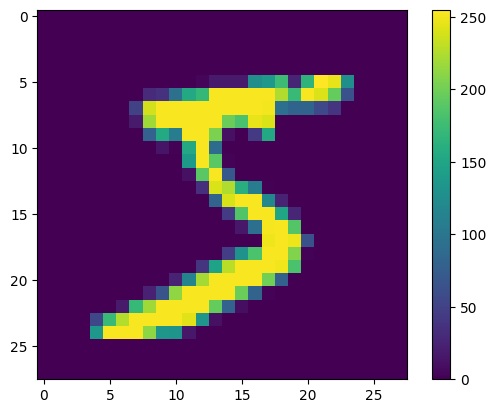

In [40]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


# Інший варіант

In [41]:
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [42]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

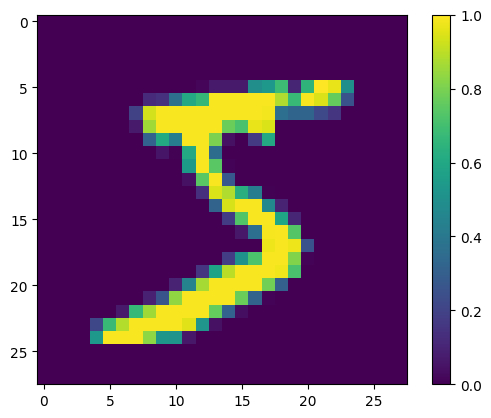

In [43]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

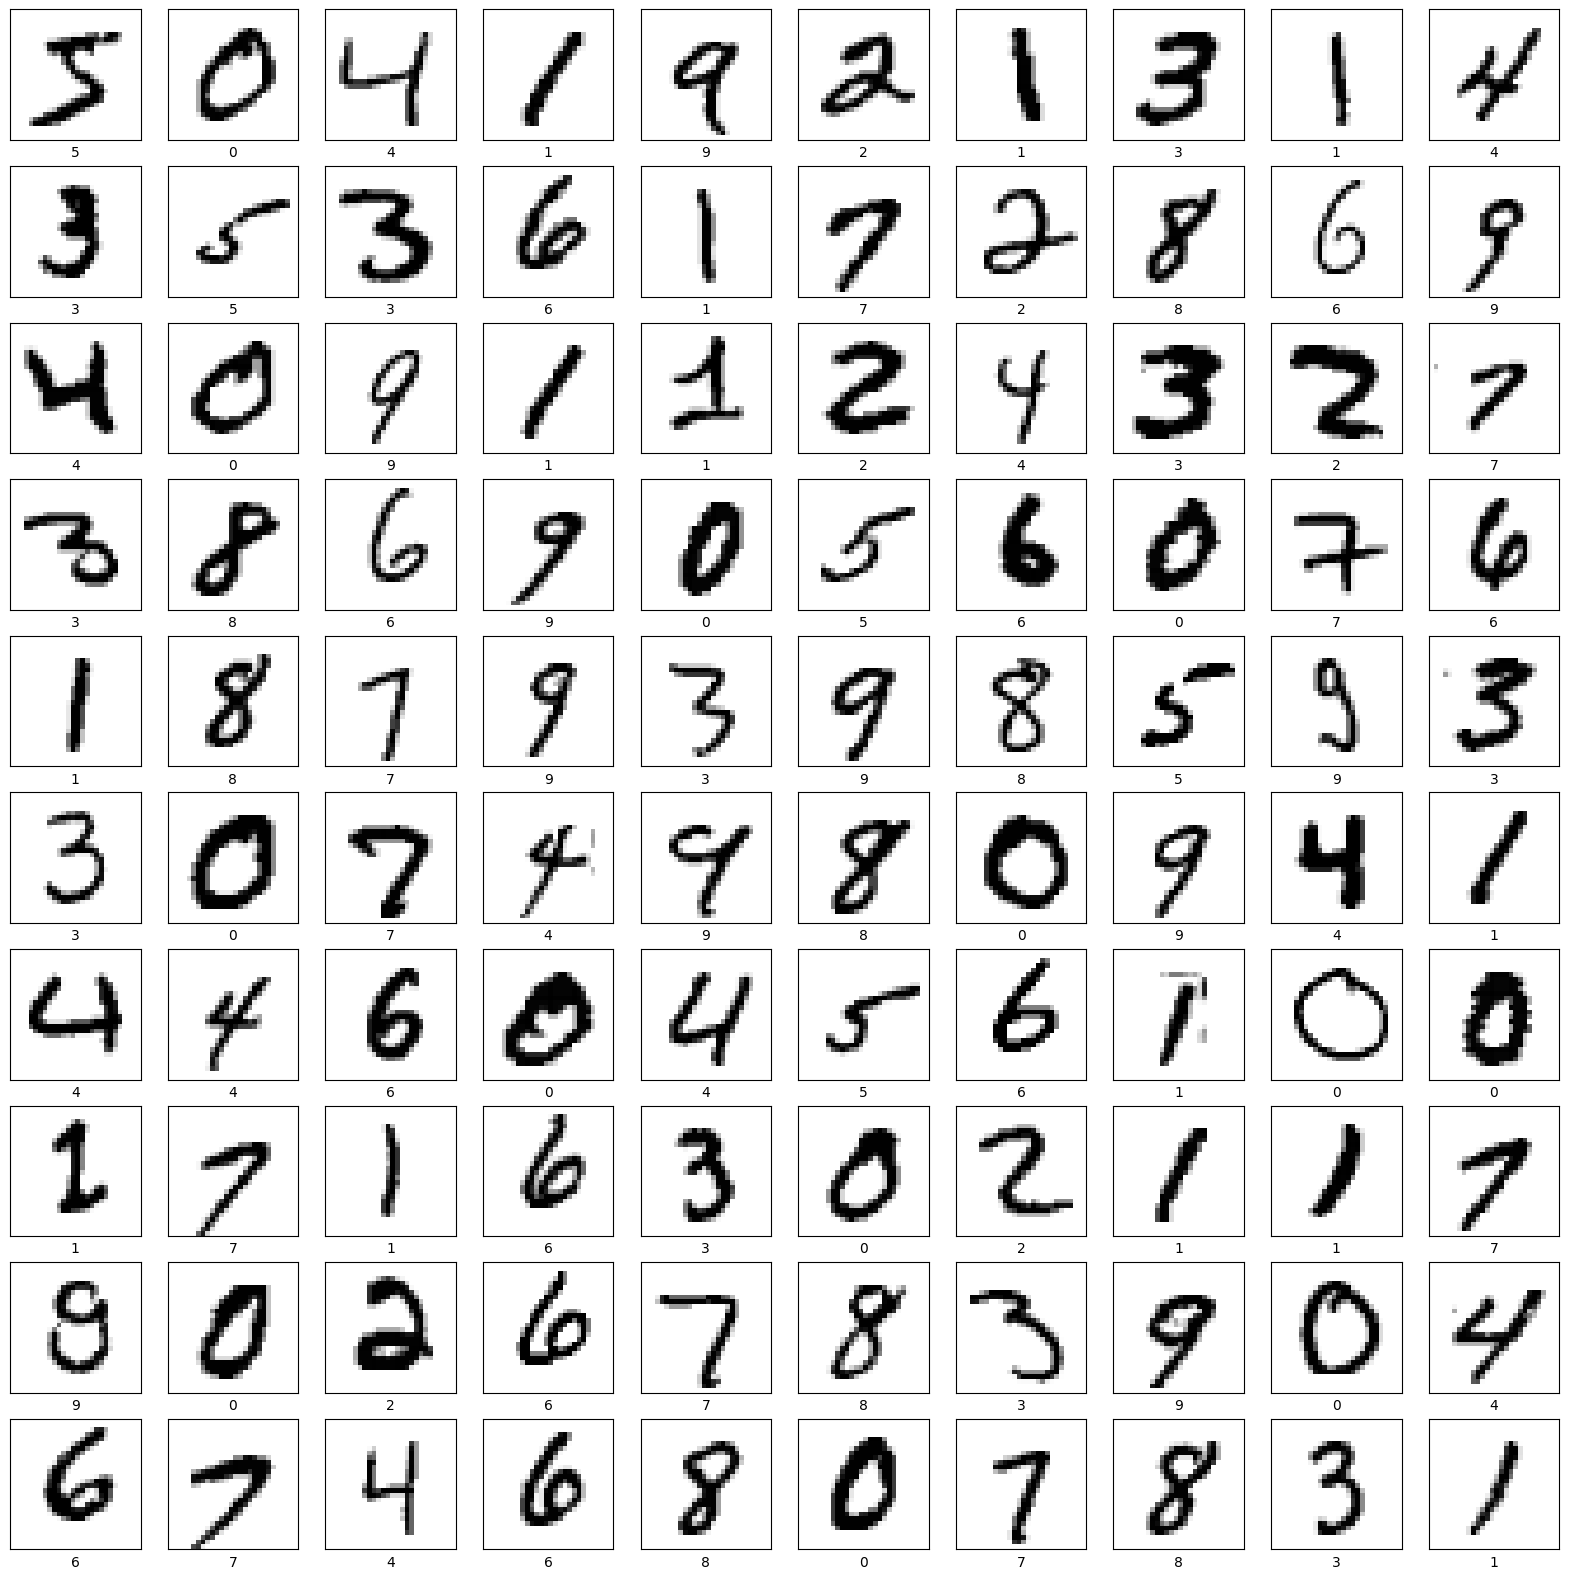

In [44]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7488 - accuracy: 0.8085 - val_loss: 0.3506 - val_accuracy: 0.8997
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3304 - accuracy: 0.9056 - val_loss: 0.2860 - val_accuracy: 0.9179
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2758 - accuracy: 0.9208 - val_loss: 0.2456 - val_accuracy: 0.9278
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2402 - accuracy: 0.9309 - val_loss: 0.2188 - val_accuracy: 0.9391
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2136 - accuracy: 0.9387 - val_loss: 0.1979 - val_accuracy: 0.9438
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1924 - accuracy: 0.9447 - val_loss: 0.1823 - val_accuracy: 0.9486
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1745 - accuracy: 0.9490 - val_loss: 0.1695 - val_accuracy:

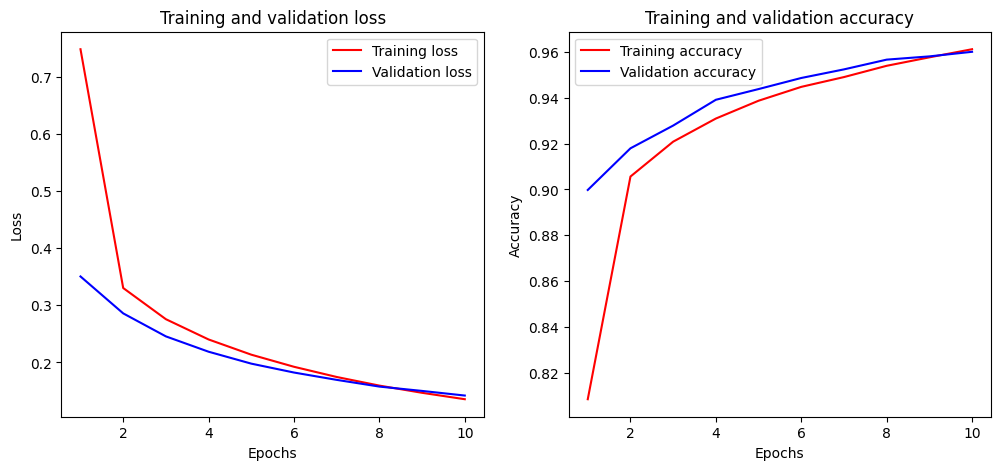

In [48]:
history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=10, validation_split=0.2)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [49]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1387 - accuracy: 0.9595
Test accuracy: 0.9595000147819519
Test loss: 0.13873504102230072


1/1 [==============================] - 0s 83ms/step
[[1.3536390e-05 1.4710142e-07 5.1759876e-04 1.4566438e-03 4.5539718e-07
  3.4915152e-05 4.1106372e-09 9.9788010e-01 1.2790049e-05 8.3845167e-05]]
Цифра, що розпізнана: 7


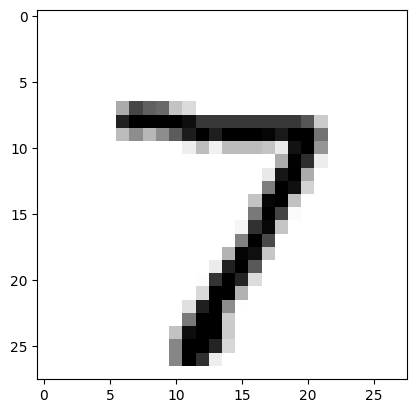

In [50]:
n=0
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Цифра, що розпізнана: {np.argmax(res)}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [51]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 4s 2ms/step


In [52]:
predictions[1]

array([9.9980426e-01, 2.9192583e-08, 1.3266364e-04, 1.3681083e-05,
       5.1849391e-08, 1.3338135e-05, 2.7552401e-06, 2.2049668e-05,
       2.1122478e-06, 9.1383872e-06], dtype=float32)

In [53]:
np.argmax(predictions[1])

0

In [54]:
y_train_1[1]

0

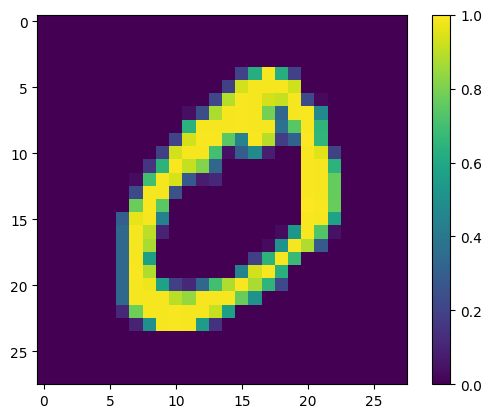

In [55]:
plt.figure()
plt.imshow(x_train_1[1])
plt.colorbar()
plt.grid(False)

In [56]:
class_names[np.argmax(predictions[1])]

'0'

In [57]:
predictions_all=model.predict(x_test_1)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test_1[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [58]:
mask=predictions_all==y_test_1
print(mask[:10])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(405, 28, 28)


In [60]:
len(x_false)

405

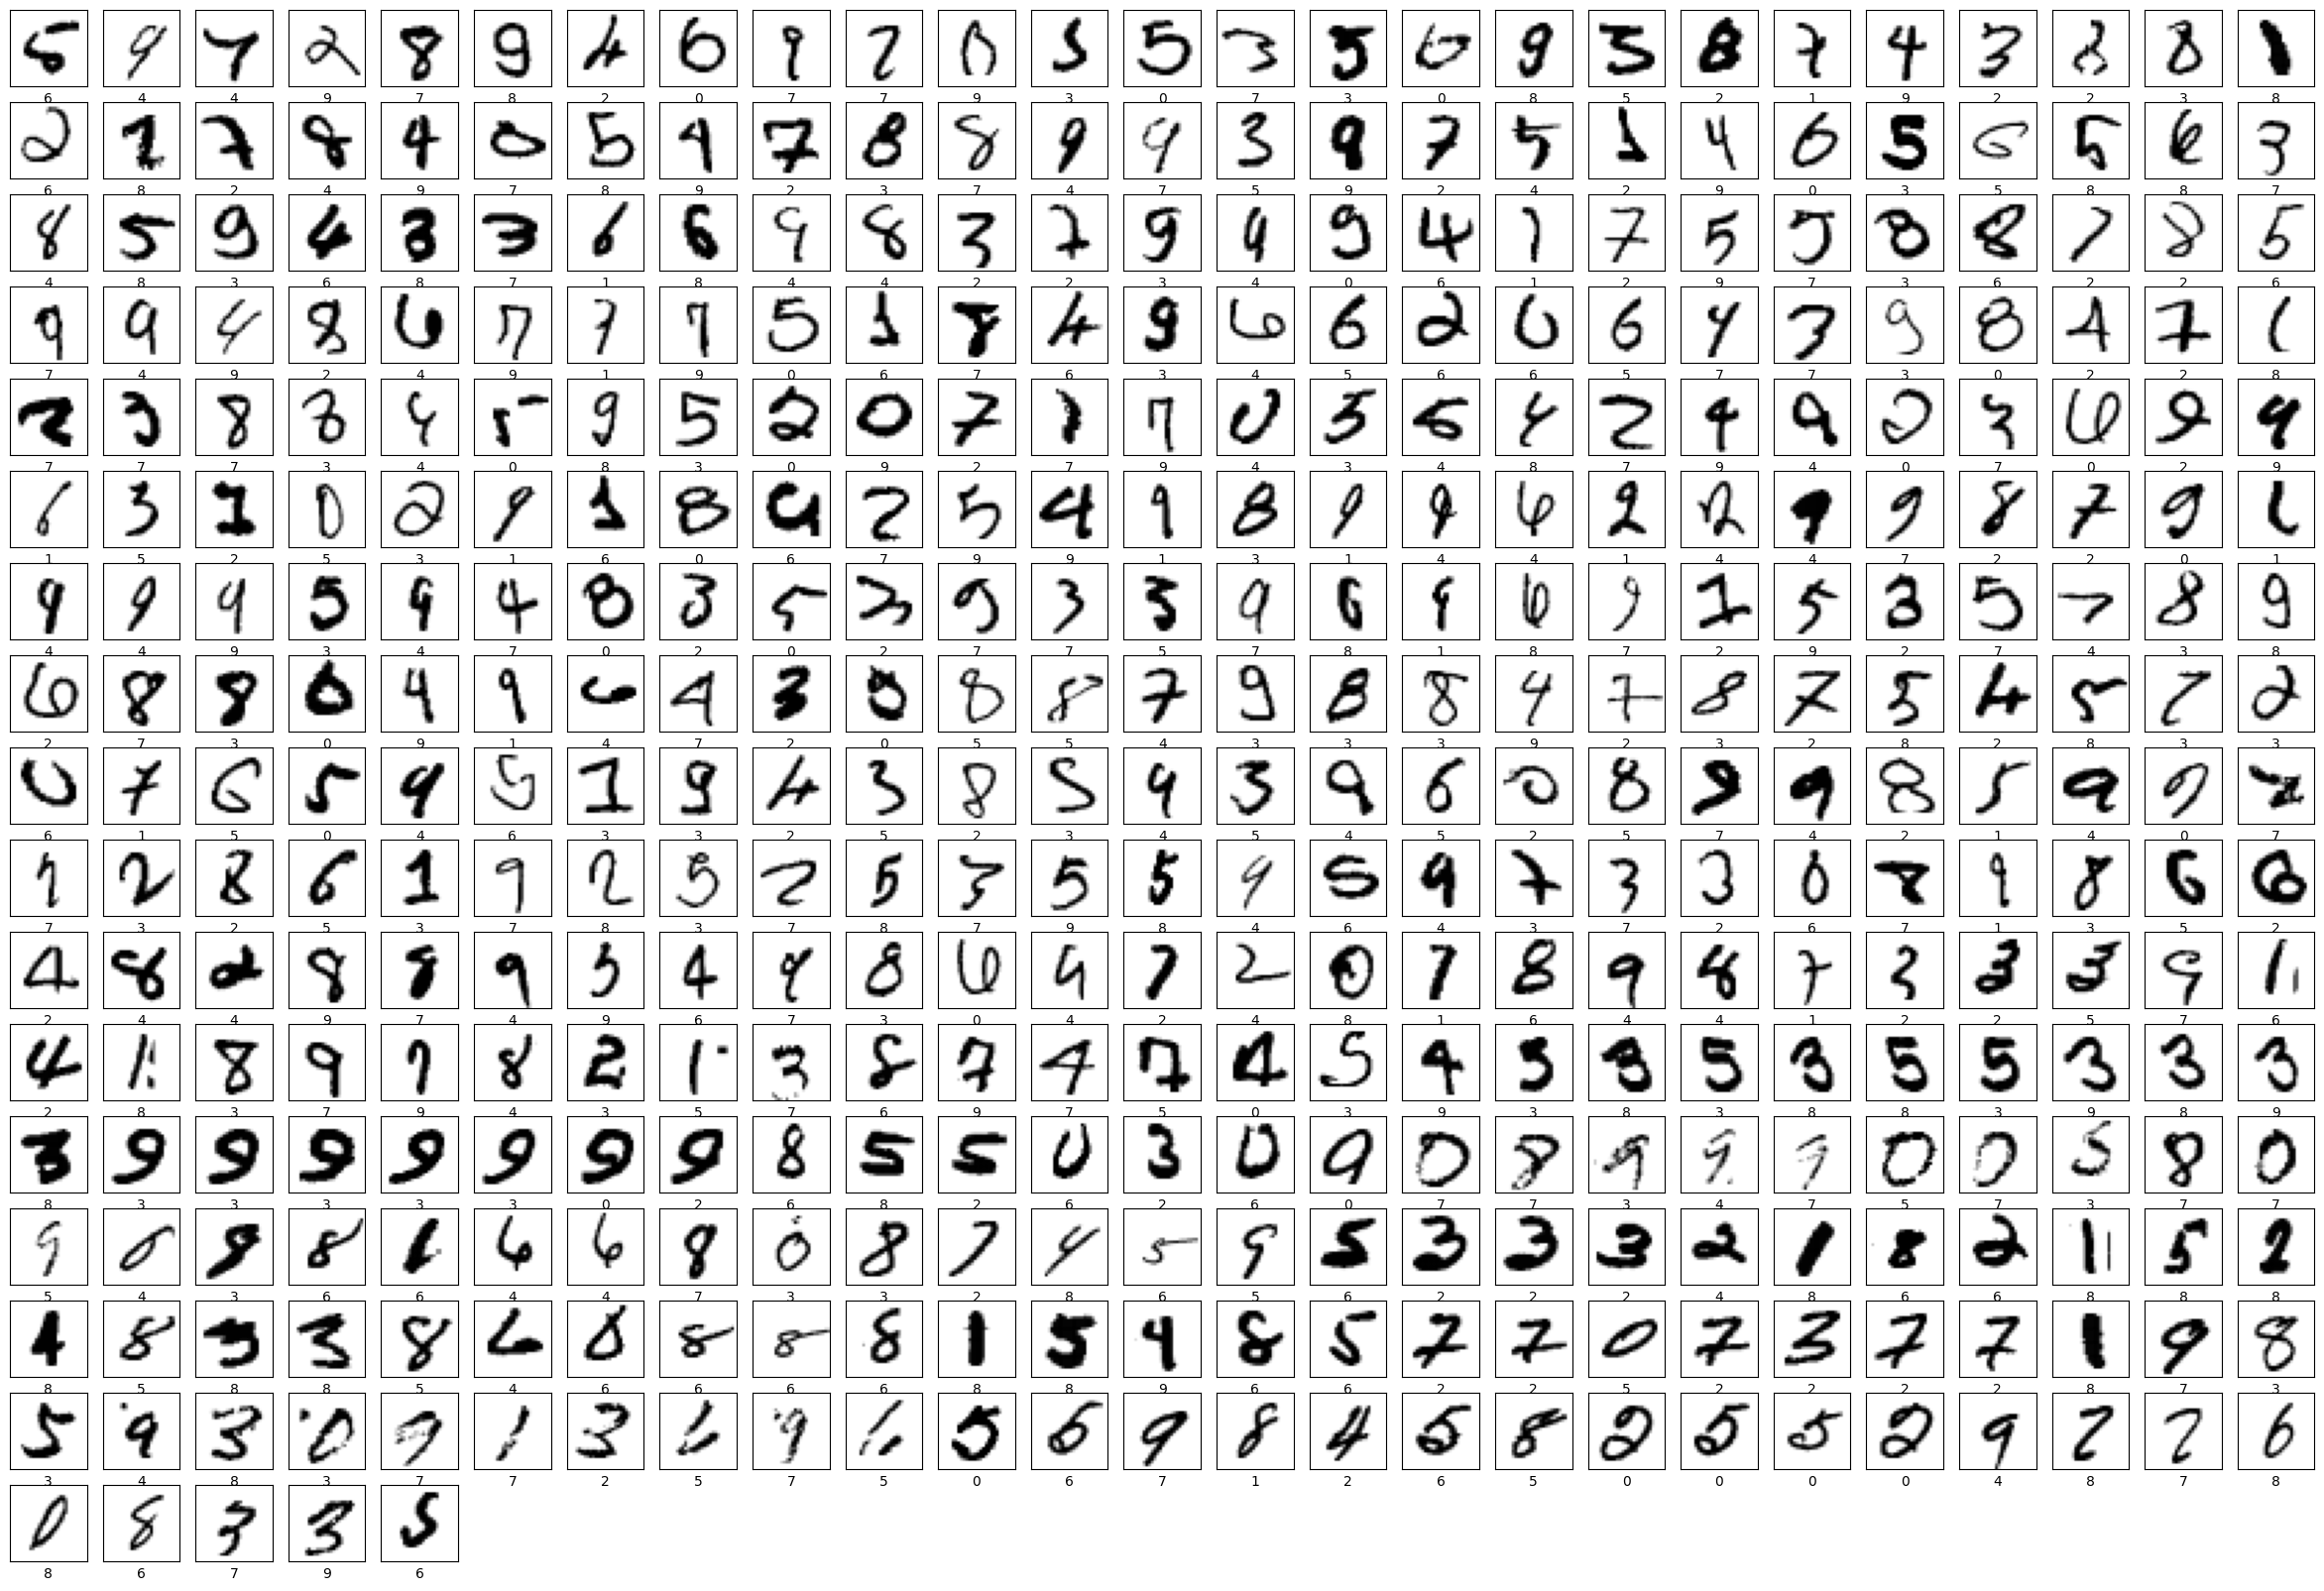

In [61]:
plt.figure(figsize=(30,30))
for i in range(len(x_false)):
  plt.subplot(25,25,i+1)
  plt.xticks([])
  plt.yticks([])
  # print("Значення мережі:"+str(y_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

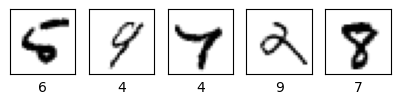

In [62]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  # print("Значення мережі:"+str(y_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [63]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"Цифра {class_names[digit]}: {count} помилкових класифікацій")

Цифра 0: 22 помилкових класифікацій
Цифра 1: 20 помилкових класифікацій
Цифра 2: 28 помилкових класифікацій
Цифра 3: 45 помилкових класифікацій
Цифра 4: 32 помилкових класифікацій
Цифра 5: 54 помилкових класифікацій
Цифра 6: 32 помилкових класифікацій
Цифра 7: 35 помилкових класифікацій
Цифра 8: 63 помилкових класифікацій
Цифра 9: 74 помилкових класифікацій


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 958    0    1    2    2    3    6    4    2    2]
 [   0 1115    3    2    0    1    4    3    7    0]
 [   4    1 1004    4    4    0    3    7    4    1]
 [   0    0   15  965    0    7    0   11    8    4]
 [   1    0    7    0  950    0    4    4    3   13]
 [   9    1    1   14    2  838   10    2   11    4]
 [   6    3    2    0    7    9  926    0    5    0]
 [   0    6   18    2    3    1    0  993    0    5]
 [   3    1    8   16    6    6   11   10  911    2]
 [   5    6    2   12   25    2    1   17    4  935]]


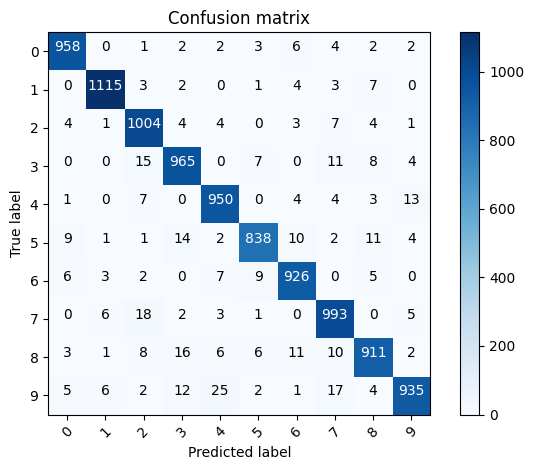

In [74]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

# ДЗ

In [32]:
# # from tensorflow.keras.datasets import mnist
# from keras.datasets import mnist

# # Завантажуємо датасет
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.
y_train, y_test = y_train, y_test
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])


# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [66]:
# Створимо нейронну мережу

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)
class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Перший шар, який складається з 128 нейронів
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1, name='Inputs')
    # Другий шар, який складається з 256 нейронів
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2, name='HiddenLayer1')
    # Вихідний шар
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes, name='Hypothesis')


  def __call__(self, x):
    # Передача даних через перші два шари та вихідний шар з функцією активації softmax
    x = self.layer_1(x)
    x = self.layer_2(x)

    return self.layer_3(x, activation=True)

# class NN(tf.Module):
#   def __init__(self, name=None):
#     super().__init__(name=name)
#     # Перший шар, який складається з 128 нейронів
#     self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1, name='Inputs')
#     # Другий шар, який складається з 256 нейронів
#     self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2, name='HiddenLayer1')
#     # Вихідний шар
#     self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes, name='Hypothesis')


#   def __call__(self, x):
#     # Передача даних через перші два шари та вихідний шар з функцією активації softmax
#     x = self.layer_1(x)
#     x = self.layer_2(x)


#     return self.layer_3(x, activation=True)

In [ ]:
# В якості функції помилки в даному випадку зручно взяти крос-ентропію
def cross_entropy(y_pred, y_true):
    # Закодувати label в one hot vector
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Значення передбачення, щоб уникнути помилки log(0).
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Обчислення крос-ентропії
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Як метрику якості використовуємо точність
def accuracy(y_pred, y_true):
    # Місце для вашого коду
    # ...

In [ ]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Функція навчання нейромережі
def train(neural_net, input_x, output_y):
  # Для налаштування вагів мережі будемо використовувати стохастичний градієнтний спуск
  optimizer = tf.optimizers.SGD(learning_rate)

  # Активація автоматичного диференціювання
  with tf.GradientTape() as g:
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)

    # Отримаємо список оптимізованих параметрів
    # Місце для вашого коду
    # Обчислимо за ними значення градієнта
    # Місце для вашого коду

    # Модифікуємо параметри
    # Місце для вашого коду

In [ ]:
# Тренування мережі

loss_history = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    # Місце для вашого коду

    if step % display_step == 0:
        pred = neural_net(batch_x)
        # Місце для вашого коду


In [ ]:
# Виведіть графіки залежності зміни точності і втрат від кроку
# Якщо все зроблено правильно, то точність повинна зростати, а втрати зменшуватись

import matplotlib.pyplot as plt

# Виведіть графік функції втрат
# Місце для вашого коду

# Виведіть графік точності
# Місце для вашого коду


In [ ]:
# Обчисліть точність навченої нейромережі
# Місце для вашого коду
# Тестування моделі на тестових даних
# Місце для вашого коду

In [ ]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

# Місце для вашого коду


